## HLW

In [1]:
import bok_da

In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
USData = pd.read_excel("../data/USData.xlsx")
end_date = datetime.datetime.strptime('2020-01-01', '%Y-%m-%d')
USData_before = USData[USData['DATE'] <= end_date]
data = USData_before.set_index("DATE")
data = data.iloc[:, :3]
data

,LnRGDP,Inflation,Rrate
DATE,,,
1962-01-01,3292.672518,1.480963,1.084135
1962-04-01,3296.275262,1.541078,1.177122
1962-07-01,3301.163538,1.314688,1.523314
1962-10-01,3302.478980,0.748789,1.651954
1963-01-01,3306.823661,1.324180,1.734483
...,...,...,...
2019-01-01,3969.936003,1.604384,0.679664
2019-04-01,3973.262714,1.689917,0.787367
2019-07-01,3977.915555,1.485512,0.528073


In [4]:
# 테스트 설정입니다. 실제 사용시에는 충분한 수의 draws와 burnin을 설정해야 합니다.
from bok_da.ts.nir import HLW

model = HLW(n_draws=2000, burnin=100)

> Initializing Model...
  - Total MCMC iterations: 2000
  - Burn-in period: 100
  - Latent variables percentiles: [5, 95]
  - Parameters percentiles: [0.05, 0.95]
  - Interest rate z-component specification: rw


In [5]:
model.fit(data, dates=data.index)

> Starting model fitting...
  - Data shape: (233, 3)
  - Dates provided with length: 233


Step 3/3 : 100%|██████████| 2000/2000 [03:17<00:00, 10.12it/s]

> Model Fitted.


In [6]:
model.ParaStorage.variable_summary()

added | variable | type    |   size(KB) | info
---------------------------------------------------
    1 | phi_yc  | ndarray |     29.812 | shape=(1900, 2)
    2 | beta_yc | ndarray |     14.969 | shape=(1900, 1)
    3 | sig2_yc | ndarray |     14.969 | shape=(1900, 1)
    4 | sig2_yt | ndarray |     14.969 | shape=(1900, 1)
    5 | sig2_g  | ndarray |     14.969 | shape=(1900, 1)
    6 | phi_p   | ndarray |     14.969 | shape=(1900, 1)
    7 | beta_p  | ndarray |     14.969 | shape=(1900, 1)
    8 | sig2_p  | ndarray |     14.969 | shape=(1900, 1)
    9 | delta_z | ndarray |     14.969 | shape=(1900, 1)
   10 | phi_z   | ndarray |     14.969 | shape=(1900, 1)
   11 | sig2_z  | ndarray |     14.969 | shape=(1900, 1)


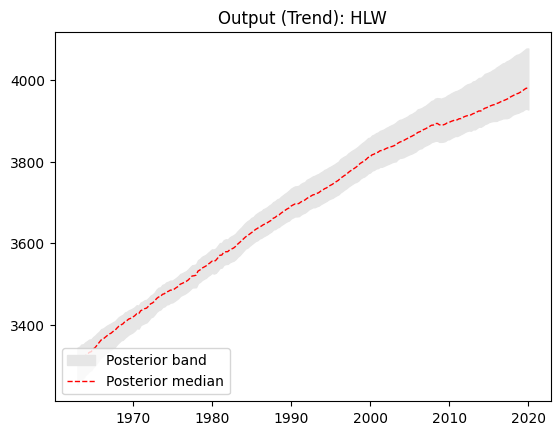

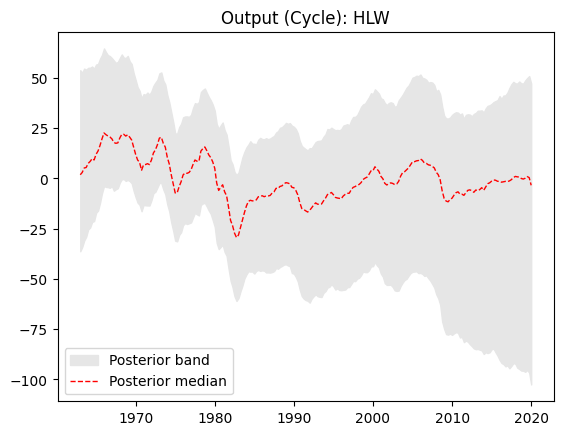

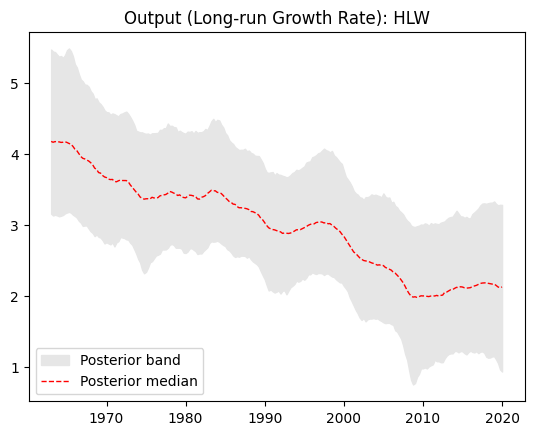

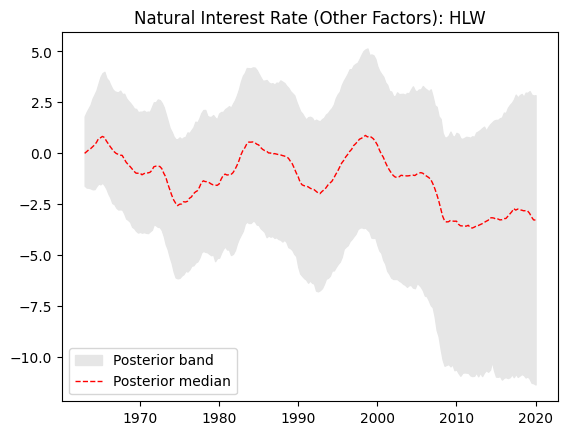

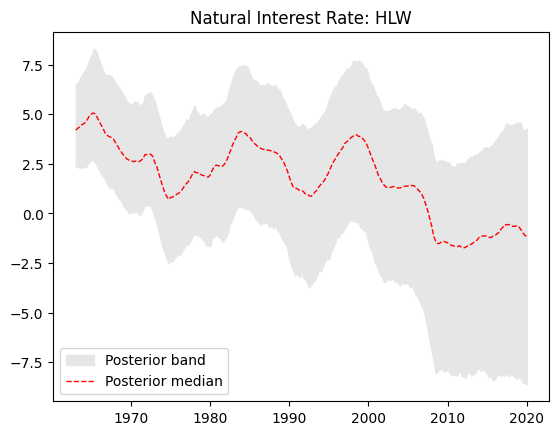

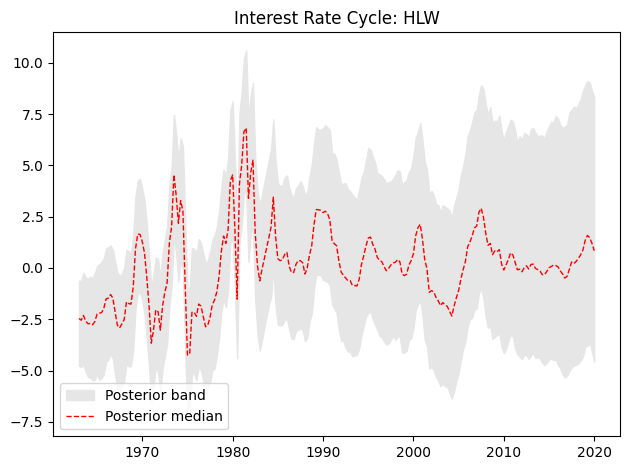

In [7]:
model.print_results()